# 最基本的学习 - 非(not)

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

#输入数据的处理
x = np.array([[0],
             [1]])
y = np.array([[1],[0]])
# 占位符
x_placeholder = tf.placeholder(tf.float32,shape=[None,1])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
# Weight和bias
W = tf.Variable(tf.random_normal([1, 1], -1, 1))
b = tf.Variable(tf.random_normal([1], -1, 1))
# 预测
y_p = tf.matmul(x_placeholder,W)+b
# y_p = tf.nn.sigmoid(tf.matmul(x_placeholder,W)+b)

# 定义损失函数，训练方法，初始化变量，并进行训练
loss=tf.reduce_mean(tf.square(y_p-y_placeholder))
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
        if i%1000==0:
            _loss = sess.run(loss,feed_dict={x_placeholder:x,y_placeholder:y})
            print("loss:",_loss)
    _y_p = sess.run(y_p,feed_dict={x_placeholder:x,y_placeholder:y})
    print("predict result:",_y_p.tolist())
    # 后续作图的准备
    line_x = np.linspace(-1,2,10).reshape([-1,1])
    line_y = sess.run(y_p,feed_dict={x_placeholder:line_x})

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


loss: 2.764134
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
loss: 1.8829382e-13
predict result: [[0.999999463558197], [2.980232238769531e-07]]


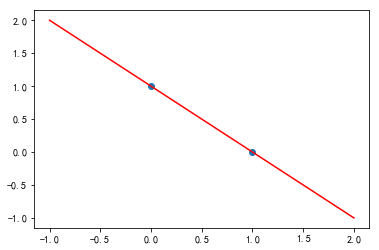

In [3]:
plt.scatter(x.reshape(2),y.reshape(2))
plt.plot(line_x,line_y,color='r')

# 最基本的学习 - 与(and)

In [71]:
import tensorflow as tf
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
y = np.array([[0],[0],[0],[1]])
# 占位符
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
# Weight和bias
W = tf.Variable(tf.random_normal([2, 1], -1, 1))
b = tf.Variable(tf.random_normal([1], -1, 1))
# 预测
# y_p = tf.matmul(x_placeholder,W)+b
y_p = tf.nn.sigmoid(tf.matmul(x_placeholder,W)+b)
# 定义损失函数，训练方法，初始化变量，并进行训练
loss=tf.reduce_mean(tf.square(y_p-y_placeholder))
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
        if i%1000==0:
            _loss = sess.run(loss,feed_dict={x_placeholder:x,y_placeholder:y})
            print("loss:",_loss)
    _y_p = sess.run(y_p,feed_dict={x_placeholder:x,y_placeholder:y})
    print("predict result:",_y_p.tolist())
    # 后续作图的准备
    line_y = np.linspace(0,1,10).repeat(10).reshape([10,10])
    line_x = line_y.T
    line_x = line_x.flatten()
    line_y = line_y.flatten()
    x_input = np.hstack([line_x[:,None],line_y[:,None]])
    line_z = sess.run(y_p,feed_dict={x_placeholder:x_input})

loss: 0.20986469
loss: 0.056832276
loss: 0.031630628
loss: 0.021158786
loss: 0.015620451
loss: 0.012261521
loss: 0.010032976
loss: 0.008457815
loss: 0.0072910655
loss: 0.00639516
predict result: [[0.0008478597737848759], [0.0814942717552185], [0.0814942717552185], [0.9026933908462524]]


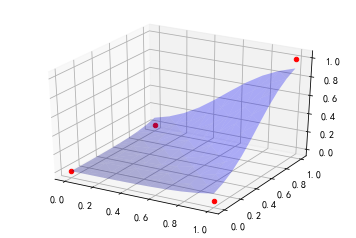

In [72]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
import matplotlib.pyplot as plt
import numpy as np
 
 

x,y,z = axes3d.get_test_data(0.05)
x,y,z=x.flatten(), y.flatten(), z.flatten()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(0,0,0,color='r')
ax.scatter(0,1,0,color='r')
ax.scatter(1,0,0,color='r')
ax.scatter(1,1,1,color='r')
# ax.plot_wireframe(x, y, z, rstride=10, cstride=10)
ax.plot_trisurf(line_x,line_y,line_z.flatten(),alpha=0.3,color='b' )

plt.show()

# 最基本的学习 - 或(or)

In [62]:
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
y = np.array([[0],[1],[1],[1]])
# 占位符
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
# Weight和bias
W = tf.Variable(tf.random_normal([2, 1], -1, 1))
b = tf.Variable(tf.random_normal([1], -1, 1))
# 预测
y_p = tf.nn.sigmoid(tf.matmul(x_placeholder,W)+b)

# 定义损失函数，训练方法，初始化变量，并进行训练
loss=tf.reduce_mean(tf.square(y_p-y_placeholder))
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
        if i%1000==0:
            _loss = sess.run(loss,feed_dict={x_placeholder:x,y_placeholder:y})
            print("loss:",_loss)
    _y_p = sess.run(y_p,feed_dict={x_placeholder:x,y_placeholder:y})
    print("predict result:",_y_p.tolist())

loss: 0.5899532
loss: 0.07087699
loss: 0.025580227
loss: 0.014396647
loss: 0.009747772
loss: 0.00727926
loss: 0.005770661
loss: 0.0047613317
loss: 0.00404219
loss: 0.0035055885
predict result: [[0.08360791206359863], [0.9481837153434753], [0.9481402039527893], [0.9997273087501526]]


# 稍微有难度的学习：异或(xor)
——为什么深度学习会兴起

In [ ]:
# 一是足够多的数据，二是有足够复杂的神经网络

In [67]:
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
y = np.array([[1],[0],[0],[1]])
# 占位符
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
# Weight和bias
W = tf.Variable(tf.random_normal([2, 1], -1, 1))
b = tf.Variable(tf.random_normal([1], -1, 1))
# 预测
y_p = tf.nn.sigmoid(tf.matmul(x_placeholder,W)+b)

# 定义损失函数，训练方法，初始化变量，并进行训练
loss=tf.reduce_mean(tf.square(y_p-y_placeholder))
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
        if i%1000==0:
            _loss = sess.run(loss,feed_dict={x_placeholder:x,y_placeholder:y})
            print("loss:",_loss)
    _y_p = sess.run(y_p,feed_dict={x_placeholder:x,y_placeholder:y})
    print("predict result:",_y_p.tolist())

loss: 0.385606
loss: 0.25000235
loss: 0.25000006
loss: 0.25
loss: 0.25
loss: 0.24999999
loss: 0.24999999
loss: 0.25
loss: 0.25
loss: 0.25
predict result: [[0.5], [0.5], [0.5], [0.5]]


发生了什么？机器学习在学习异或的时候是失灵的，或者换句话说，对于异或，单层的机器学习并没有学习到任何信息。那么，多层神经网络能否学习到一些新的信息呢？

In [74]:
#输入数据的处理
x = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
y = np.array([[1],[0],[0],[1]])
# 占位符
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
# Weight和bias
W_1 = tf.Variable(tf.random_normal([2, 2], -1, 1))
b_1 = tf.Variable(tf.random_normal([2], -1, 1))
# 隐藏层
y_hidden = tf.nn.sigmoid(tf.matmul(x_placeholder,W_1)+b_1)

# Weight和bias
W_2 = tf.Variable(tf.random_normal([2, 2], -1, 1))
b_2 = tf.Variable(tf.random_normal([2], -1, 1))
# 预测
y_p = tf.nn.sigmoid(tf.matmul(y_hidden,W)+b)

# 定义损失函数，训练方法，初始化变量，并进行训练
loss=tf.reduce_mean(tf.square(y_p-y_placeholder))
train=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
        if i%1000==0:
            _loss = sess.run(loss,feed_dict={x_placeholder:x,y_placeholder:y})
            print("loss:",_loss)
    _y_p = sess.run(y_p,feed_dict={x_placeholder:x,y_placeholder:y})
    print("predict result:",_y_p.tolist())
    # 后续作图的准备
    line_y = np.linspace(0,1,10).repeat(10).reshape([10,10])
    line_x = line_y.T
    line_x = line_x.flatten()
    line_y = line_y.flatten()
    x_input = np.hstack([line_x[:,None],line_y[:,None]])
    line_z = sess.run(y_p,feed_dict={x_placeholder:x_input})

loss: 0.36803716
loss: 0.23066951
loss: 0.16127996
loss: 0.067993015
loss: 0.031372763
loss: 0.018299907
loss: 0.012381516
loss: 0.009168432
loss: 0.0071986
loss: 0.005885243
predict result: [[0.9222893118858337], [0.06697525084018707], [0.06737726181745529], [0.9310181736946106]]


隐藏层成功的学习到了更多的信息，帮助我们更好的完成了分类任务！

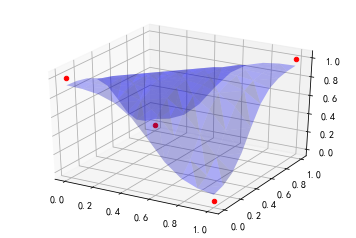

In [76]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
import matplotlib.pyplot as plt
import numpy as np
 
 

x,y,z = axes3d.get_test_data(0.05)
x,y,z=x.flatten(), y.flatten(), z.flatten()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(0,0,1,color='r')
ax.scatter(0,1,0,color='r')
ax.scatter(1,0,0,color='r')
ax.scatter(1,1,1,color='r')
# ax.plot_wireframe(x, y, z, rstride=10, cstride=10)
ax.plot_trisurf(line_x,line_y,line_z.flatten(),alpha=0.3,color='b' )

plt.show()

In [70]:
#一个更加有用一点的loss函数：
# loss=z * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
# 其中z是标签，x是logits（对数几率，也就是）的值
# 这个函数的名字叫做交叉熵函数，事实上，逻辑回归就是用的这个激活函数，tensorflow内部已经有了实现，它位于
# tf.losses.sigmoid_cross_entropy,想了解更多的信息，可以阅读信息论中相关知识
# baike地址：
# https://baike.baidu.com/item/%E4%BA%A4%E5%8F%89%E7%86%B5